In [9]:
# Step 1: Import necessary libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


In [10]:
# Step 2: Define function to get output layers
def get_output_layers(net):
    """ Get output layers from the YOLO model """
    layer_names = net.getLayerNames()
    try:
        output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    except:
        output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers


In [13]:
# Step 3: Set file paths and check existence
weights_path = 'D:/AI Course Digicrome/One Python/Nexthike-Project Work/Project 10-New-AWS-OCR/OCR_Project/cfg/yolov3-608.weights'
config_path = 'D:/AI Course Digicrome/One Python/Nexthike-Project Work/Project 10-New-AWS-OCR/OCR_Project/cfg/yolov3-608.cfg'
classes_path = 'D:/AI Course Digicrome/One Python/Nexthike-Project Work/Project 10-New-AWS-OCR/OCR_Project/cfg/yolov3-classes.txt.txt'

# Check if the files exist before loading
if not os.path.exists(weights_path):
    raise FileNotFoundError(f"Weight file not found: {weights_path}")
if not os.path.exists(config_path):
    raise FileNotFoundError(f"Config file not found: {config_path}")
if not os.path.exists(classes_path):
    raise FileNotFoundError(f"Classes file not found: {classes_path}")


In [14]:
# Step 4: Load YOLOv3 class labels from file
with open(classes_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Generate random colors for each class for visualizing results
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))


In [15]:
# Step 5: Load YOLOv3 model weights and config file
net = cv2.dnn.readNet(weights_path, config_path)
print("YOLOv3 model loaded successfully.")


YOLOv3 model loaded successfully.


In [17]:
# Load the input image for processing
image_path = 'images/repo3.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Get image dimensions
Height, Width = image.shape[:2]
scale = 0.00392  # YOLO model scaling factor


In [18]:
# Create the input blob for the image
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)

# Set the input blob to the network
net.setInput(blob)

# Perform a forward pass to get outputs from YOLO layers
outs = net.forward(get_output_layers(net))

# Debugging: Print output details
print("Number of outputs:", len(outs))
for output in outs:
    print("Output shape:", output.shape)


Number of outputs: 3
Output shape: (507, 85)
Output shape: (2028, 85)
Output shape: (8112, 85)


In [22]:
# Define the confidence threshold and other parameters
CONFIDENCE_THRESHOLD = 0.3  # Confidence threshold for filtering weak detections
NMS_THRESHOLD = 0.4  # Non-Maximum Suppression threshold to remove overlapping boxes

# Initialize lists to hold detected bounding boxes, class IDs, and confidence scores
boxes = []
class_ids = []
confidences = []

# Process the outputs from the YOLO model
for output in outs:
    for detection in output:
        # Extract the objectness score
        box_confidence = detection[4]  # Objectness score
        
        # Proceed only if the objectness score is higher than the threshold
        if box_confidence > CONFIDENCE_THRESHOLD:
            scores = detection[5:]  # Get the scores for all classes
            class_id = np.argmax(scores)  # Get the index of the highest score (class id)
            confidence = scores[class_id]  # Get the confidence of the predicted class

            # Filter out weak detections based on confidence
            if confidence > CONFIDENCE_THRESHOLD:
                # Scale bounding box back to the original image size
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)

                # Calculate the top-left corner of the bounding box
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Save the box coordinates, confidence, and class ID
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

# Check if any boxes were detected
if boxes:
    print("Detected boxes:", boxes)
    print("Class IDs:", class_ids)
    print("Confidences:", confidences)

    # Apply Non-Maximum Suppression to remove overlapping boxes
    indices = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

    print("Indices after NMS:", indices)  # Debugging line

    # Check if indices are empty
    if len(indices) == 0:
        print("No boxes left after NMS.")
    else:
        # Draw bounding boxes on the original image
        for i in indices.flatten():
            if i < len(boxes):  # Check if i is a valid index for boxes
                # Extract coordinates and dimensions of the bounding box
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])  # Access class_ids using i
                confidence = confidences[i]  # Access confidences using i

                # Choose a color for the bounding box
                color = COLORS[class_ids[i]]
                cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)  # Draw the rectangle
                cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)  # Label the box
else:
    print("No detections found.")


Detected boxes: [[61, 57, 996, 474]]
Class IDs: [63]
Confidences: [0.31367623805999756]
Indices after NMS: [0]


IndexError: list index out of range

In [3]:
# Load the input image for processing
image = cv2.imread('images/repo3.jpg')

# Get image dimensions
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392  # YOLO model scaling factor


In [53]:
import os

# Path to the model and config files
weights_path = 'D:/AI Course Digicrome/One Python/Nexthike-Project Work/Project 10-New-AWS-OCR/OCR_Project/cfg/yolov3-608.weights'
config_path = 'D:/AI Course Digicrome/One Python/Nexthike-Project Work/Project 10-New-AWS-OCR/OCR_Project/cfg/yolov3-608.cfg'
classes_path = 'D:/AI Course Digicrome/One Python/Nexthike-Project Work/Project 10-New-AWS-OCR/OCR_Project/cfg/yolov3-classes.txt.txt'

# Check if the files exist before loading
if not os.path.exists(weights_path):
    raise FileNotFoundError(f"Weight file not found: {weights_path}")
if not os.path.exists(config_path):
    raise FileNotFoundError(f"Config file not found: {config_path}")
if not os.path.exists(classes_path):
    raise FileNotFoundError(f"Classes file not found: {classes_path}")

# Load YOLOv3 class labels from file
with open(classes_path, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Generate random colors for each class for visualizing results
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# Load YOLOv3 model weights and config file
net = cv2.dnn.readNet(weights_path, config_path)

# Print success message after loading
print("YOLOv3 model loaded successfully.")


YOLOv3 model loaded successfully.


In [54]:
def get_output_layers(net):
    layer_names = net.getLayerNames()
    
    # Ensure proper access to unconnected out layers
    try:
        output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    except:
        # Handle case where net.getUnconnectedOutLayers() returns scalar values
        output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    return output_layers

# Load and prepare the image for YOLO
image = cv2.imread('D:/AI Course Digicrome/One Python/Nexthike-Project Work/Project 10-New-AWS-OCR/OCR_Project/images/repo3.jpg')

# Get the image dimensions
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

# Create the input blob for the image
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)

# Set the input blob to the network
net.setInput(blob)

# Perform a forward pass to get outputs from YOLO layers
outs = net.forward(get_output_layers(net))

print


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

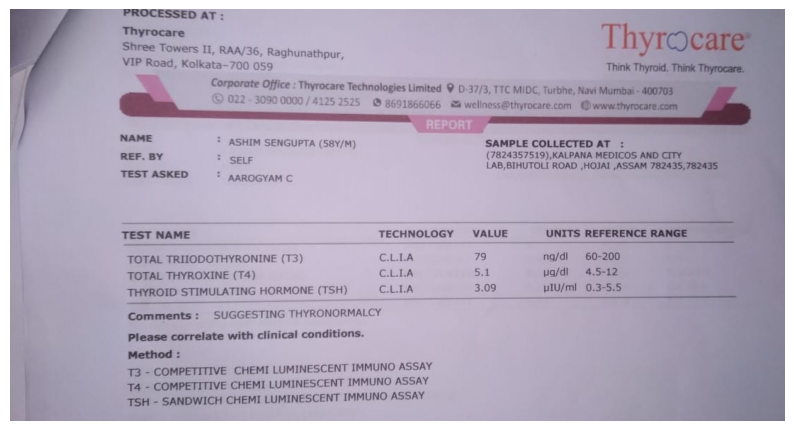

In [55]:
import matplotlib.pyplot as plt

# Save the resulting image with bounding boxes
output_image_path = 'output/detected_image.jpg'
cv2.imwrite(output_image_path, image)

# Load the saved image using matplotlib and display it
image_bgr = cv2.imread(output_image_path)  # Read the image in BGR format
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct color representation

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()


In [56]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a directory for cropped images if it doesn't exist
cropped_images_dir = 'cropped_images'
if not os.path.exists(cropped_images_dir):
    os.makedirs(cropped_images_dir)

# Assuming you have the 'boxes' and 'indices' from the object detection step
# boxes: List of bounding box coordinates
# indices: List of indices of the detections that you want to crop

# Example: boxes = [[x, y, w, h], ...] and indices = [[0], [1], ...]

# Check if there are detections
if len(indices) > 0:
    for i in indices:
        i = i[0]  # Get the index from the list
        box = boxes[i]
        x, y, w, h = box
        
        # Crop the detected object from the image
        crop_img = image[y:y+h, x:x+w]

        # Save the cropped image
        cropped_image_path = os.path.join(cropped_images_dir, f'cropped_image_{i}.jpg')
        cv2.imwrite(cropped_image_path, crop_img)

        # Display the cropped image using Matplotlib
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.axis('off')  # Turn off axis labels
        plt.title(f'Cropped Image {i}')
        plt.show(block=True)  # Use block=True to ensure the plot shows before moving to the next
else:
    print("No detections found. Please check your detection step.")


No detections found. Please check your detection step.


In [23]:
import cv2
import numpy as np

# Define the confidence threshold and other parameters
CONFIDENCE_THRESHOLD = 0.3  # Lowering this threshold might help with detection
NMS_THRESHOLD = 0.4  # Non-Maximum Suppression threshold

# Read the image (assuming you have already loaded the image using OpenCV)
image = cv2.imread('images/repo3.jpg')  # Update with your image path

# Get the image dimensions (height, width)
height, width = image.shape[:2]  # Get height and width from the image

# Assume 'outs' contains the outputs from the YOLO model after processing the image
# For example: outs = net.forward(layer_names)

# Check the number of outputs and their shapes
print("Number of outputs:", len(outs))  # Check the number of outputs
for output in outs:
    print("Output shape:", output.shape)  # Print the shape of each output

# Example of processing output to extract boxes and class IDs
boxes = []
class_ids = []
confidences = []

# Process each output
for output in outs:
    for detection in output:
        # Extract the bounding box coordinates and confidence scores
        box_confidence = detection[4]  # Objectness score

        # Debugging: Print objectness score
        print(f"Objectness score: {box_confidence}")

        # Only proceed if the objectness score is higher than the threshold
        if box_confidence > CONFIDENCE_THRESHOLD:
            scores = detection[5:]  # Get the scores for all classes
            class_id = np.argmax(scores)  # Get the index of the highest score (class id)
            confidence = scores[class_id]  # Get the confidence of the predicted class

            # Debugging: Print the class ID and confidence
            print(f"Class ID: {class_id}, Confidence: {confidence}")

            # Filter out weak detections based on confidence
            if confidence > CONFIDENCE_THRESHOLD:
                # Scale bounding box back to image size
                center_x = int(detection[0] * width)  # Width of the image
                center_y = int(detection[1] * height)  # Height of the image
                w = int(detection[2] * width)  # Width of the bounding box
                h = int(detection[3] * height)  # Height of the bounding box

                # Calculate the top-left corner of the bounding box
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Save the box coordinates, confidence, and class ID
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

# Check if any boxes are detected
if boxes:
    print("Detected boxes:", boxes)  # Print the boxes detected
    print("Class IDs:", class_ids)    # Print the class IDs
    print("Confidences:", confidences) # Print the confidences

    # Apply Non-Maximum Suppression to remove overlapping boxes
    indices = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

    # Check if indices are empty
    if len(indices) > 0:
        for i in indices.flatten():
            # Ensure the index is within the range of boxes
            if i < len(boxes):  # Added bounds checking
                # Extract the coordinates of the box and draw it on the image
                x, y, w, h = boxes[i]
                label = str(class_ids[i])
                confidence = confidences[i]

                # Draw the bounding box and label on the image
                color = (0, 255, 0)  # Green for bounding boxes
                cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
                cv2.putText(image, f"{label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    else:
        print("No boxes left after NMS.")
else:
    print("No detections found.")

# Optionally, save or display the resulting image
cv2.imwrite('output_image.jpg', image)  # Save the image with bounding boxes
# cv2.imshow('Detected Objects', image)  # Display the image in a window
# cv2.waitKey(0)  # Wait for a key press
# cv2.destroyAllWindows()  # Close the window


Number of outputs: 3
Output shape: (507, 85)
Output shape: (2028, 85)
Output shape: (8112, 85)
Objectness score: 4.654887675314967e-08
Objectness score: 3.043360763399505e-08
Objectness score: 9.963120106704082e-09
Objectness score: 3.6812175494560506e-06
Objectness score: 1.405156950795572e-07
Objectness score: 5.411876724537024e-09
Objectness score: 3.0354469345184043e-05
Objectness score: 3.124453087366419e-07
Objectness score: 3.231722800478565e-08
Objectness score: 6.297345680650324e-05
Objectness score: 3.700068589296279e-07
Objectness score: 1.2172154129075352e-07
Objectness score: 0.0001320092414971441
Objectness score: 4.440954342044279e-07
Objectness score: 2.447145561745856e-07
Objectness score: 0.00022995661129243672
Objectness score: 1.8690479919314384e-07
Objectness score: 4.934692583447031e-07
Objectness score: 0.002685321494936943
Objectness score: 2.9514599191315938e-06
Objectness score: 1.2301787137403153e-05
Objectness score: 0.00044907332630828023
Objectness score: 

True

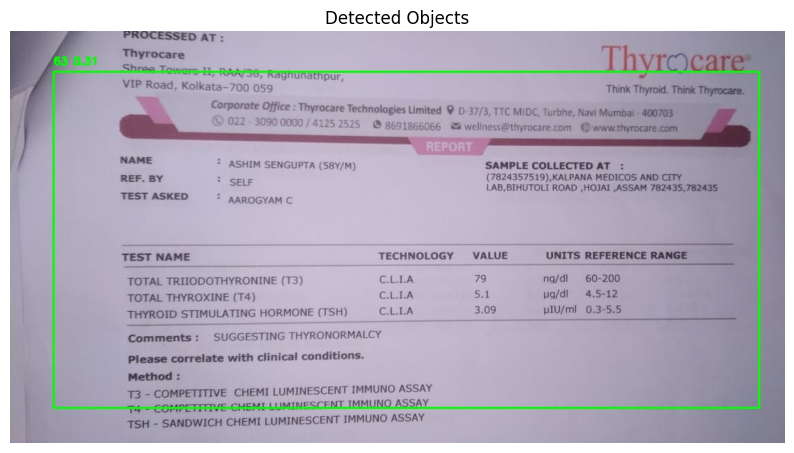

In [24]:
# Display the image with bounding boxes using matplotlib
output_image_path = 'output/detected_image.jpg'
cv2.imwrite(output_image_path, image)  # Save the resulting image with bounding boxes

# Load and display the saved image
image_bgr = cv2.imread(output_image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Detected Objects')
plt.show()


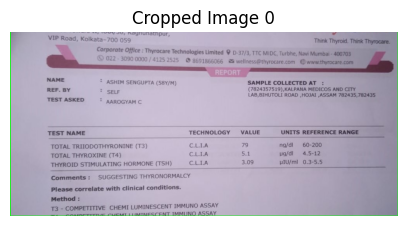

In [25]:
# Create a directory for cropped images if it doesn't exist
cropped_images_dir = 'cropped_images'
if not os.path.exists(cropped_images_dir):
    os.makedirs(cropped_images_dir)

# Check if there are detections and crop them
if len(indices) > 0:
    for i in indices.flatten():
        box = boxes[i]
        x, y, w, h = box

        # Crop the detected object from the image
        crop_img = image[y:y+h, x:x+w]

        # Save the cropped image
        cropped_image_path = os.path.join(cropped_images_dir, f'cropped_image_{i}.jpg')
        cv2.imwrite(cropped_image_path, crop_img)

        # Display the cropped image using Matplotlib
        plt.figure(figsize=(5, 5))
        plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.axis('off')
        plt.title(f'Cropped Image {i}')
        plt.show(block=True)
else:
    print("No detections found to crop.")
